# CLUSTERING ANALYSIS 

Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

### Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.
Datasets :

### Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset

### Implementing Clustering Algorithms:
•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.


### Cluster Analysis and Interpretation:
•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.


### Visualization:
Visualize the clustering results using scatter plots or other suitable visualization techniques.
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.
Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading data
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name = 'data')

In [4]:
# backup for data
data= df.copy()

In [5]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


### Data Exploration¶

In [6]:
data.shape

(3999, 12)

In [7]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
data.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [9]:
data.sample()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
823,833,765738,0,5,1,1,62133,14,0,0,6112,1


In [10]:
data.rename(columns={'Award?' : 'Award'},inplace=True)
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### Quick Data Check

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


### Statistical summary

In [12]:

data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


### Remove unnecessary columns

In [13]:
data= data.drop('ID#', axis=1)

In [14]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


### Identifying Missing Values

In [15]:
data.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [16]:
# There is no missing value

# Data Visualization

Text(0.5, 1.0, 'Whether the client has a Award or not')

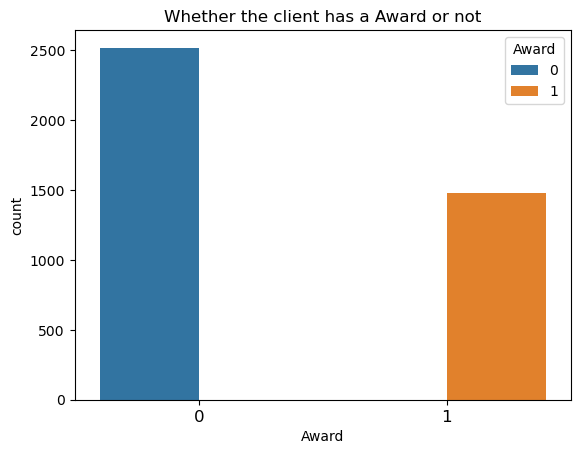

In [18]:
sns.countplot(x='Award', data=data, order=data['Award'].value_counts().index,hue='Award')
plt.xticks(fontsize=12)
plt.title('Whether the client has a Award or not')

Approximately 2500 client not have any Award while 1500 clients with Awards

Text(0.5, 1.0, 'Number of miles eligible for award travel')

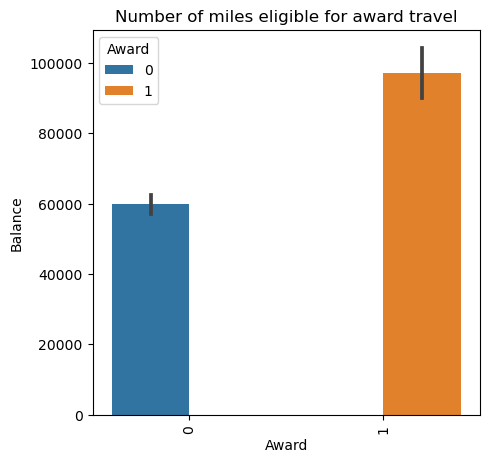

In [19]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = data[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance,hue='Award')
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.title('Number of miles eligible for award travel')

In [20]:
# what is correlated with Balance?

corr_matrix = data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

<Axes: >

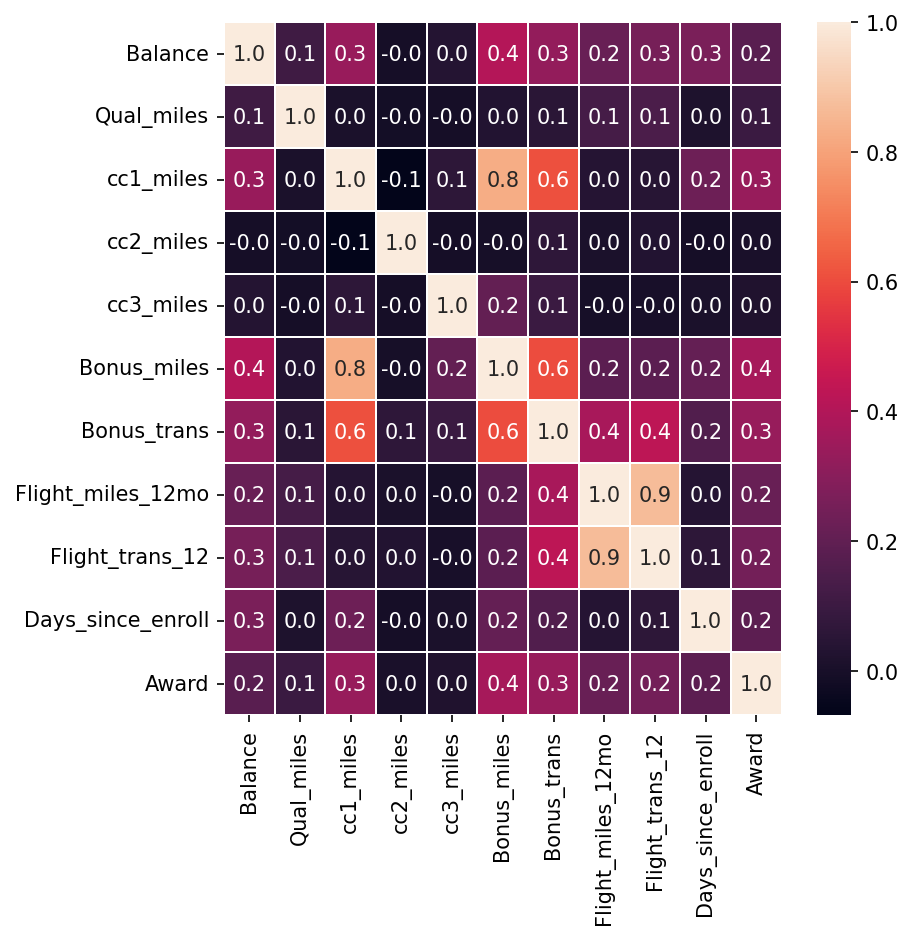

In [21]:
plt.figure(figsize=(6,6),dpi=150)
sns.heatmap(data.corr(),annot=True, linewidths=.2, fmt='.1f')

Unique points in this correlation matrix:

flight_trans_12 is positively correlated with flight_miles_12mo

bonus_trans is positively correlated with cc1_miles

bonus_trans is positively correlated with bonus_miles

bonus_miles is positively correlated with cc1_miles

In other words, the following are positively correlated

Number of flight transactions in the past 12 months <-> Number of flight miles in the past 12 months

Miles passengers earn with the freq. flyer credit card <-> Amount of non-flight transactions

Number of non-flight bonus transactions <-> Miles passengers earn from non-flight bonus transactions

Miles passengers earn from non-flight bonus transactions <-> Miles passengers earn with the freq. flyer credit card



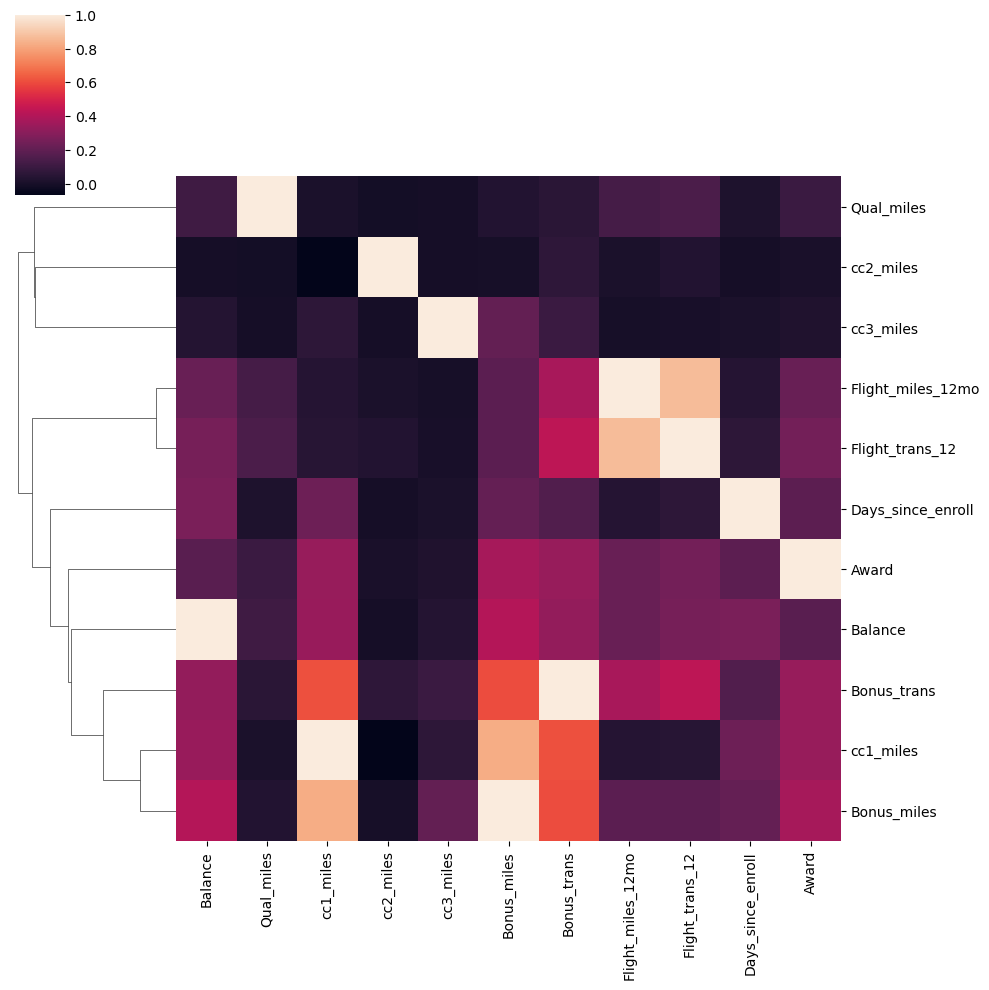

In [22]:
sns.clustermap(data.corr(),col_cluster=False)


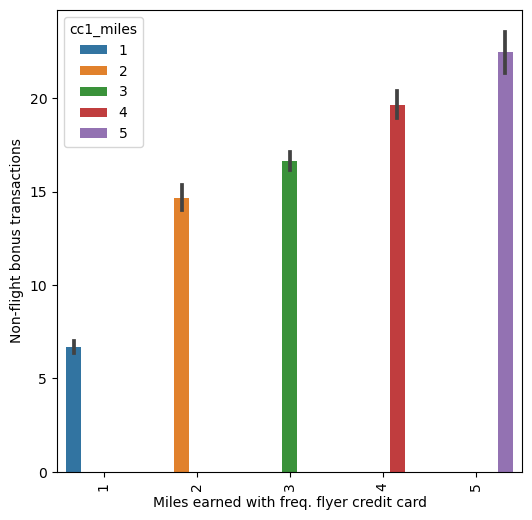

In [24]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (6,6),dpi=100)
sorted_data=data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans',ascending= False)
ax=sns.barplot(x='cc1_miles', y='Bonus_trans',data=sorted_data,hue='cc1_miles')
ax.set(xlabel='Miles earned with freq. flyer credit card', ylabel='Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

People who fly more frequently use bonus transactions more


# Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler= StandardScaler()
scaled_data= scaler.fit_transform(data)
scaled_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# K-Means Clustering

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [36]:
ssd = []
silhouette_scores = []

for k in range(2,20):
    
    model = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = model.fit_predict(scaled_data)
   
    score = silhouette_score(scaled_data, kmeans_labels)
    
    ssd.append(model.inertia_)
    silhouette_scores.append(score)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\clust

(2.0, 20.0)

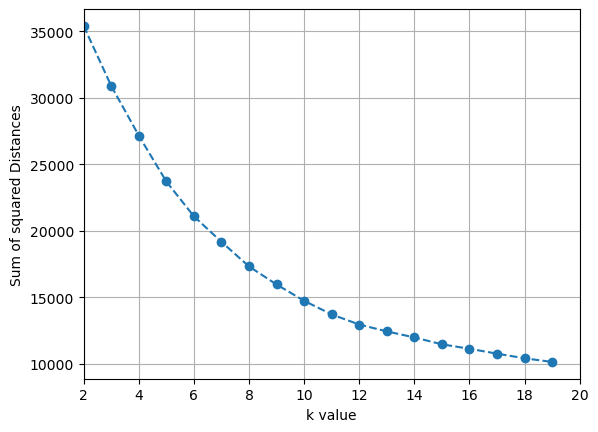

In [37]:
plt.plot(range(2,20),ssd, 'o--')
plt.grid()
plt.xlabel('k value')
plt.ylabel('Sum of squared Distances')
plt.xlim(2,20)

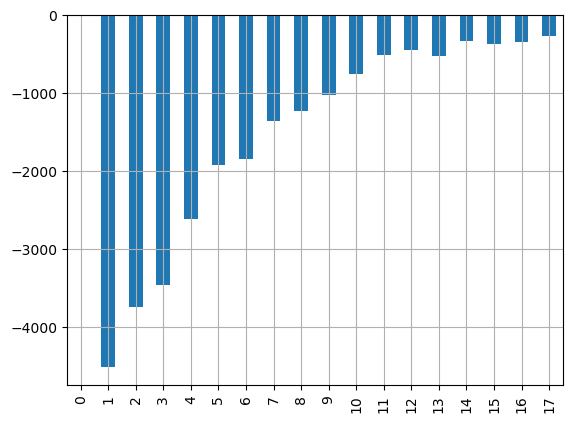

In [41]:
pd.Series(ssd).diff().plot(kind='bar')
plt.grid()

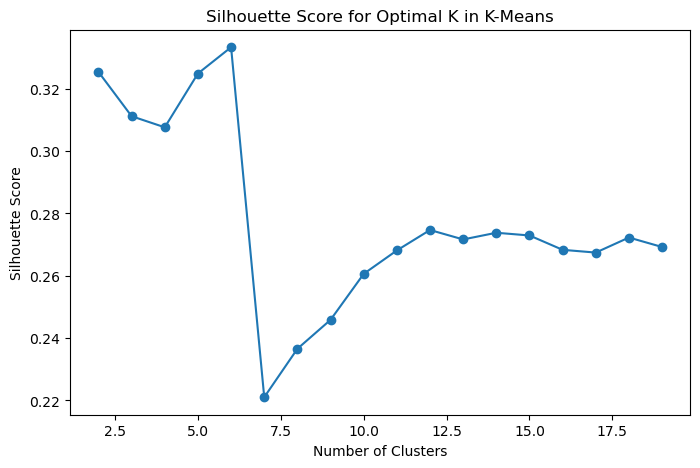

In [45]:
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K in K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [47]:
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

print("Optimal K value :",optimal_k)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Optimal K value : 6


In [49]:
kmeans.labels_

array([2, 2, 2, ..., 0, 2, 2])

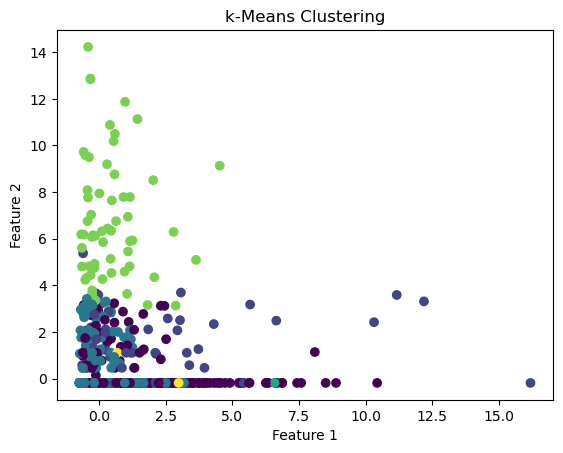

In [51]:
# Load the cluster labels
cluster_lables = kmeans.labels_


#create a scatter plot of the data, colored by cluster membership
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=cluster_lables)

# Add axis labels and title

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("k-Means Clustering")


#show the plot

plt.show()


In [54]:
data['KMenas Labels'] = kmeans.labels_

In [56]:
data.corr()['KMenas Labels'].sort_values()

cc1_miles           -0.738782
Bonus_miles         -0.560866
Bonus_trans         -0.477793
Award               -0.361958
Balance             -0.284188
Days_since_enroll   -0.238513
Flight_miles_12mo   -0.067191
Flight_trans_12     -0.065121
cc3_miles            0.087150
Qual_miles           0.241648
cc2_miles            0.337501
KMenas Labels        1.000000
Name: KMenas Labels, dtype: float64

# Hierarchical Clustering

In [57]:
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster import hierarchy

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [58]:
hierarchical_model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

In [59]:
hierarchy_labels = hierarchical_model.fit_predict(scaled_data)

In [60]:
hierarchy_labels

array([3470, 3288, 3053, ...,    2,    1,    0], dtype=int64)

In [61]:
linkage_matrix = hierarchy.linkage(hierarchical_model.children_)


In [62]:
linkage_matrix

array([[6.80000000e+01, 8.40000000e+01, 1.41421356e+00, 2.00000000e+00],
       [3.70000000e+02, 5.40000000e+02, 1.41421356e+00, 2.00000000e+00],
       [3.00000000e+00, 4.50000000e+01, 1.41421356e+00, 2.00000000e+00],
       ...,
       [3.30600000e+03, 7.99100000e+03, 3.41884483e+02, 3.99500000e+03],
       [3.92200000e+03, 7.99200000e+03, 3.66191207e+02, 3.99600000e+03],
       [7.86200000e+03, 7.99300000e+03, 5.23398510e+02, 3.99800000e+03]])

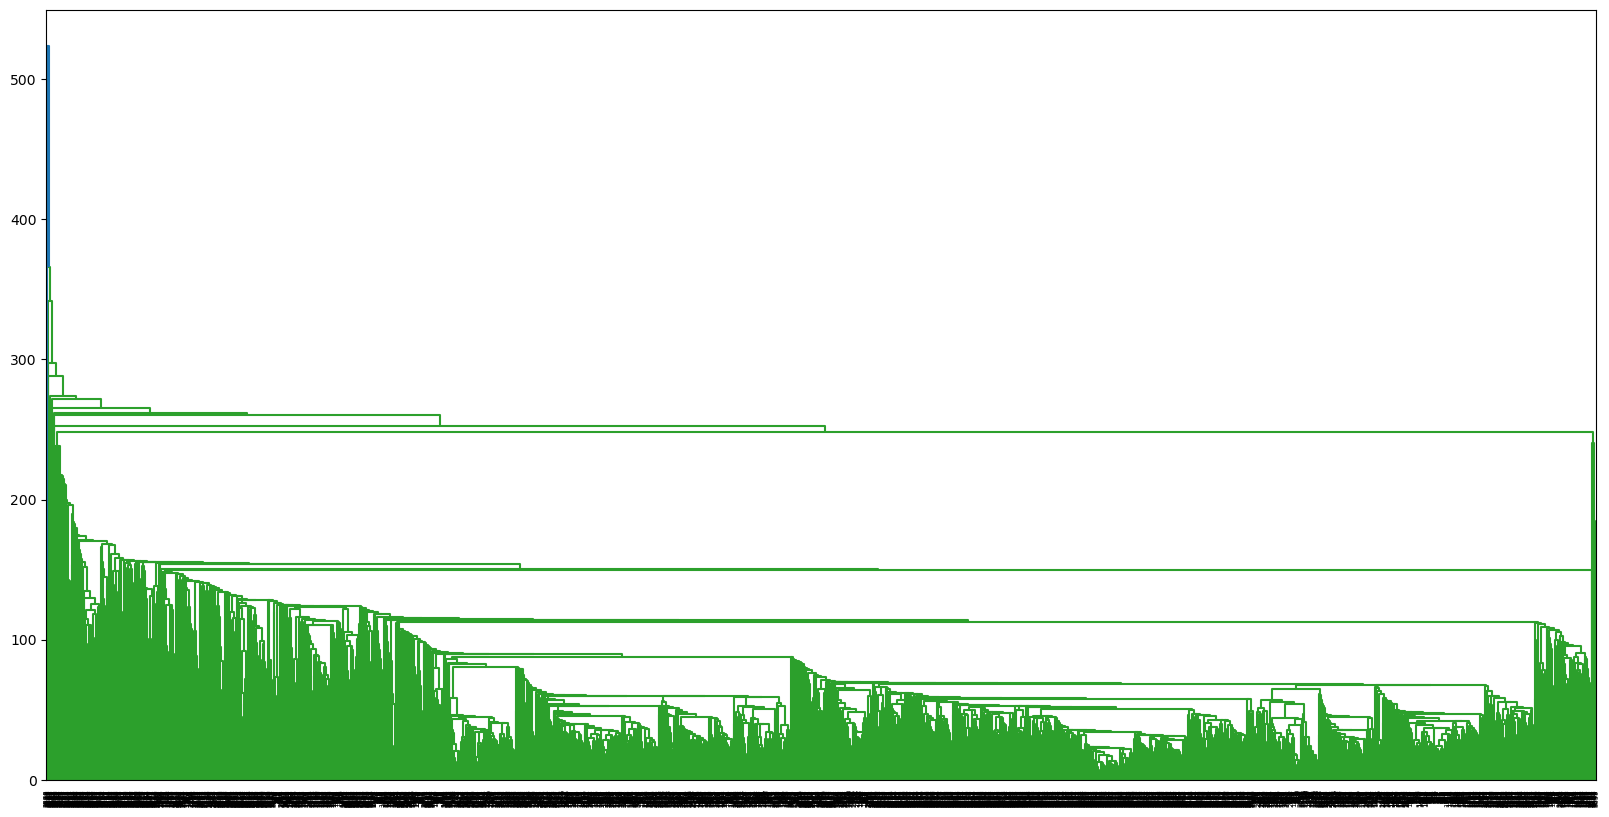

In [63]:
plt.figure(figsize=(20,10))
dendro = dendrogram(linkage_matrix)

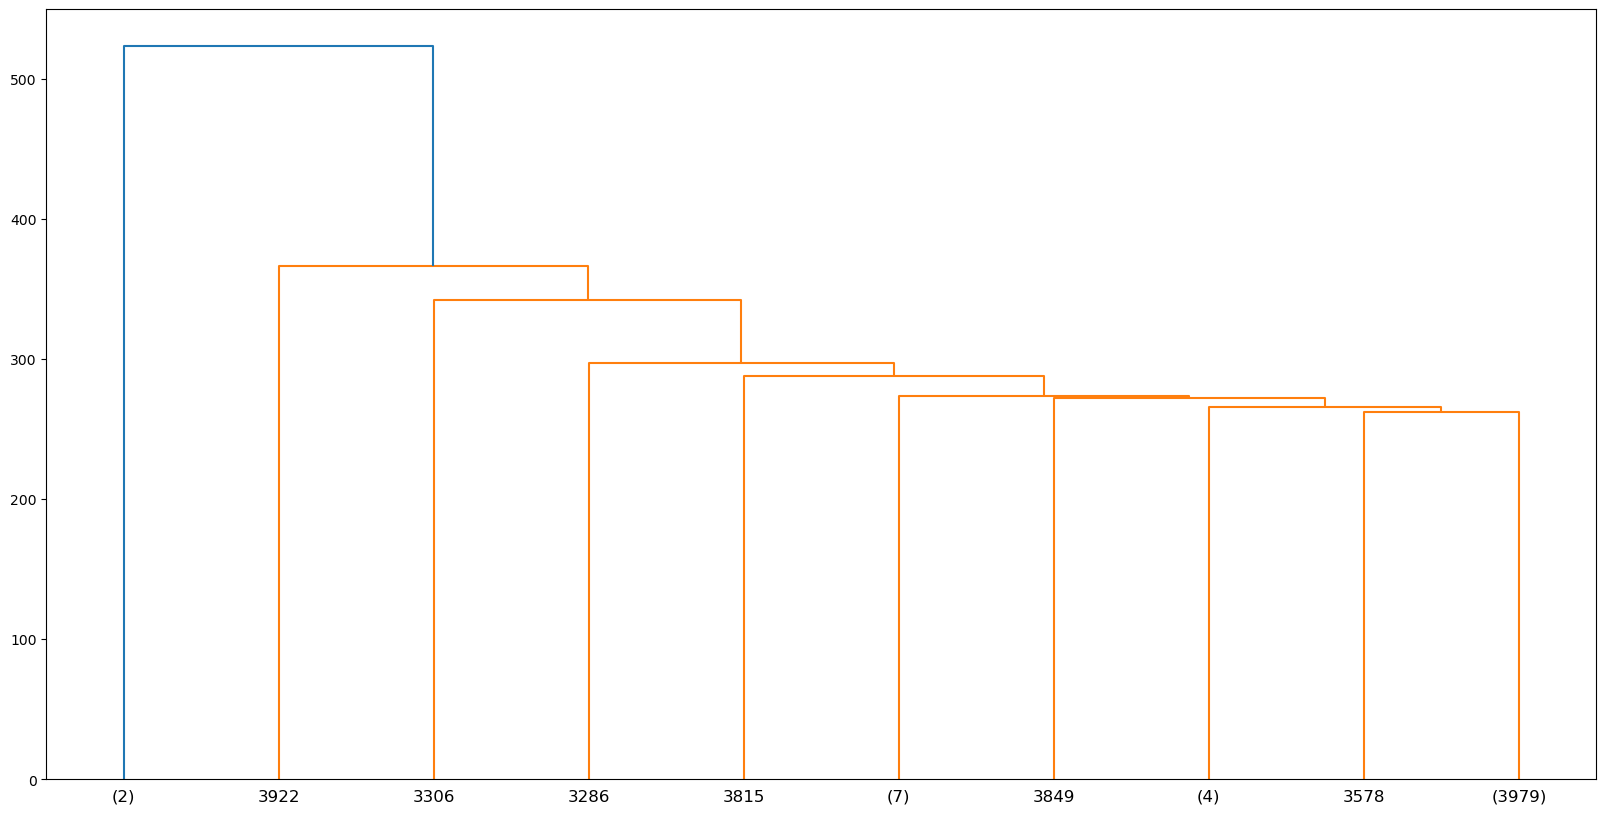

In [64]:
plt.figure(figsize=(20,10))
dendro = dendrogram(linkage_matrix,truncate_mode='lastp',p=10)

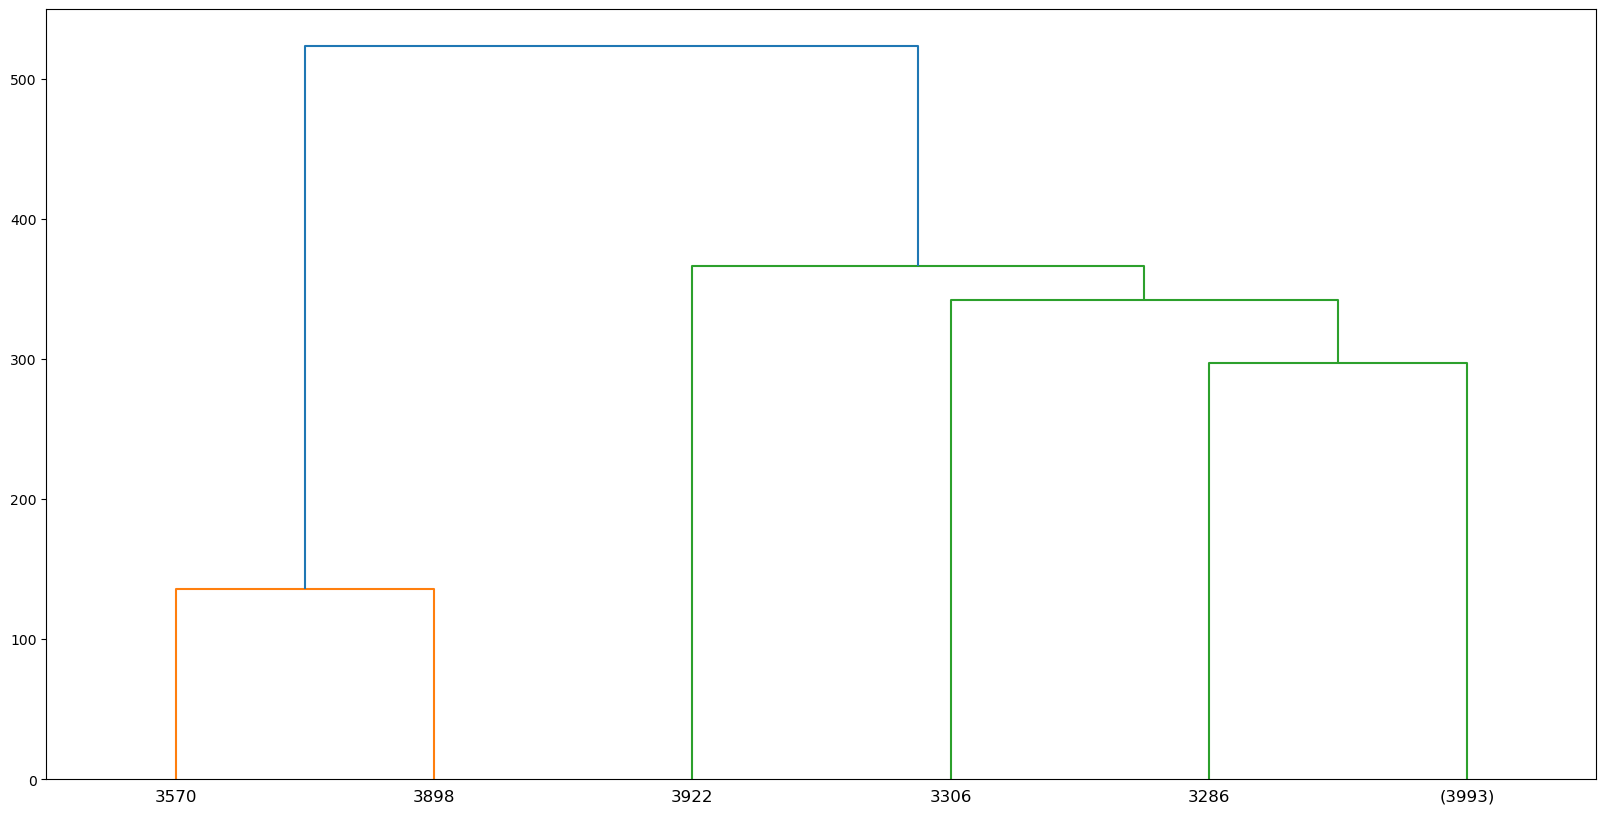

In [65]:
plt.figure(figsize=(20,10))
dendro = dendrogram(linkage_matrix,truncate_mode='level',p=3)

In [66]:
# Calculate linkage matrix
linked = linkage(scaled_data, method='ward')

In [67]:
# Initialize an array to store the SSD for different numbers of clusters
ssd = []

# Iterate through different numbers of clusters
for k in range(1, 11):  # You can adjust the range as needed
    # Perform hierarchical clustering and assign labels
    labels = fcluster(linked, k, criterion='maxclust')
    
    # Calculate the centroids of each cluster
    centroids = [data[labels == i].mean(axis=0) for i in range(1, k + 1)]
    
    # Calculate the SSD
    cluster_ssd = sum(((data[labels == i] - centroids[i - 1]) ** 2).sum() for i in range(1, k + 1))
    ssd.append(cluster_ssd)

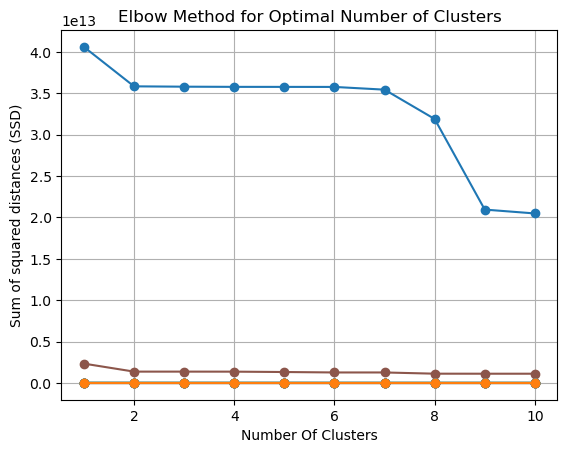

In [68]:
# Plot the SSD versus the number of clusters
plt.plot(range(1,11),ssd, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number Of Clusters')
plt.ylabel('Sum of squared distances (SSD)')
plt.grid(True)
plt.show()

The elbow method suggests that the data is best represented by two clusters.

In [69]:
hierarchical_model= AgglomerativeClustering(n_clusters=2)

In [70]:
cluster_lables=hierarchical_model.fit_predict(scaled_data)

In [71]:
cluster_lables

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [72]:
data['Hierarchical Labels'] = hierarchical_model.labels_
data['Hierarchical Labels'].value_counts()

1    2489
0    1510
Name: Hierarchical Labels, dtype: int64

In [73]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,KMenas Labels,Hierarchical Labels
0,28143,0,1,1,1,174,1,0,0,7000,0,2,1
1,19244,0,1,1,1,215,2,0,0,6968,0,2,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,1
3,14776,0,1,1,1,500,1,0,0,6952,0,2,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0


In [74]:
data.drop(['KMenas Labels'],axis=1).corr()['Hierarchical Labels'].sort_values()

cc1_miles             -0.762121
Bonus_miles           -0.643698
Bonus_trans           -0.603085
Award                 -0.484722
Balance               -0.342525
Flight_trans_12       -0.227925
Qual_miles            -0.223792
Flight_miles_12mo     -0.219069
Days_since_enroll     -0.214992
cc3_miles             -0.080585
cc2_miles              0.076520
Hierarchical Labels    1.000000
Name: Hierarchical Labels, dtype: float64

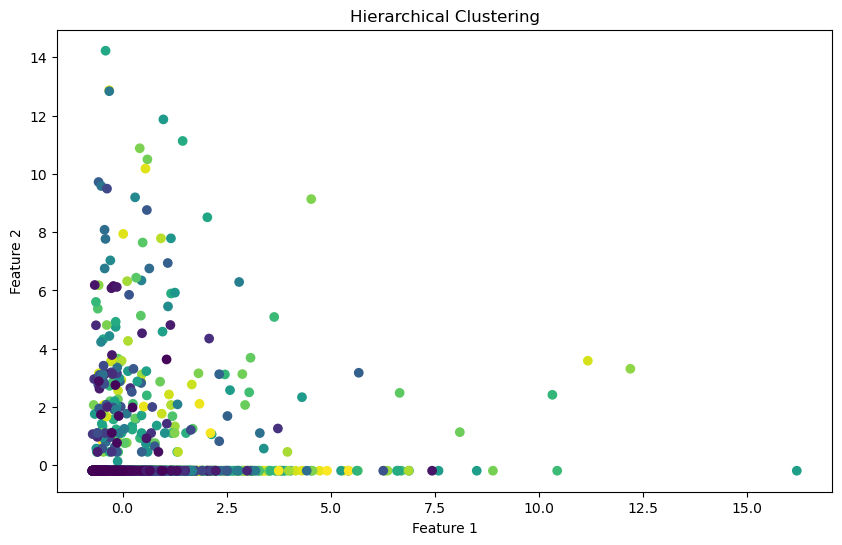

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hierarchy_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# DBSCAN

In [77]:
from sklearn.cluster import DBSCANdb

In [78]:
dbscan= DBSCAN()

In [79]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_data.shape[1])
    dbscan.fit(scaled_data)
    
    percent_outliers = 100*np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(percent_outliers)

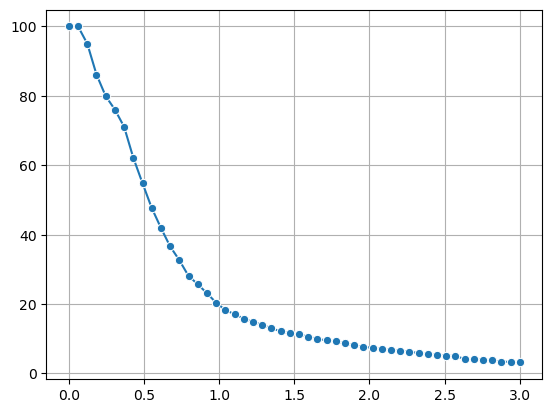

In [80]:
sns.lineplot(x=np.linspace(0.001,3,50), y=outlier_percent,marker='o')
plt.grid()

Based on the plot created previously, retraining a DBSCAN model with a reasonable epsilon value.

In [81]:
dbscan = DBSCAN(eps=2,min_samples=scaled_data.shape[1])

In [82]:
dbscan.fit(scaled_data)

DBSCAN(eps=2, min_samples=11)

In [83]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

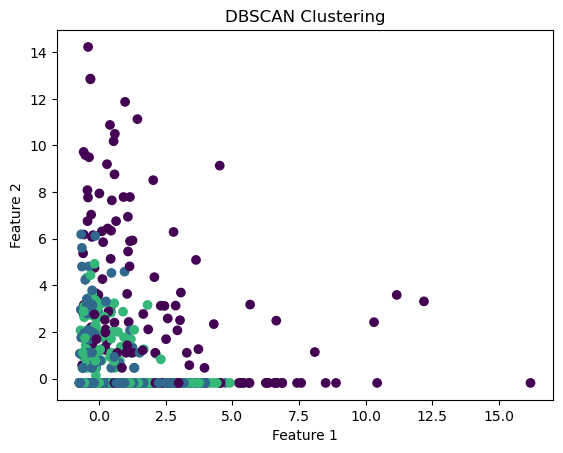

In [84]:
# Load the cluster labels
dbscan_labels = dbscan.labels_

# Create a scatter plot of the data, colored by cluster membership
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels)

# Add axis labels and a title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering")

# Show the plot
plt.show()

In [85]:
data['DBSCAN Labels'] = dbscan_labels
data['DBSCAN Labels'].value_counts()

 0    2441
 1    1302
-1     240
 2      16
Name: DBSCAN Labels, dtype: int64

In [86]:
data.sample(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,KMenas Labels,Hierarchical Labels,DBSCAN Labels
2387,38591,0,2,1,1,11039,18,0,0,3488,1,2,0,1
3318,80906,0,3,1,1,23548,15,0,0,2140,0,2,1,0
3378,11816,0,1,1,1,0,0,0,0,1596,0,2,1,0
3649,41537,3576,1,1,1,3000,3,250,1,669,1,4,0,1
62,10120,0,1,1,1,0,0,0,0,6864,0,2,1,0
1936,54388,0,4,1,1,27516,14,0,0,3903,1,0,0,1
2136,227776,0,4,1,1,47286,19,2276,5,3980,0,0,0,0
516,22878,0,1,1,1,9039,32,0,0,6641,1,0,0,1
3516,1250,0,1,1,1,625,5,0,0,1071,0,2,1,0
2380,15610,0,1,1,1,0,0,0,0,3508,0,2,1,0
